In [49]:
import sys
sys.path.append("../../")
sys.path.append("../../deepYeast/")
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
import numpy as np
import os

In [17]:
from deepYeast.analyser.utils import file_traverse
from deepYeast.cvat.image_to_xml import main

In [94]:
root = "/media/wd/T7/data/no_meet/"

In [148]:
file_list = file_traverse(root, file_regular=r'.*/raw/.*.tif$')

In [297]:
len(file_list)

87

In [411]:
filename = file_list[87]#"/media/wd/T7/data/mating_all/20221215_vd_001/tif/20221225_vd_02_05_R3D.tif"
image = imread(filename).astype(np.uint16)
print(image.shape)
print(filename)

IndexError: list index out of range

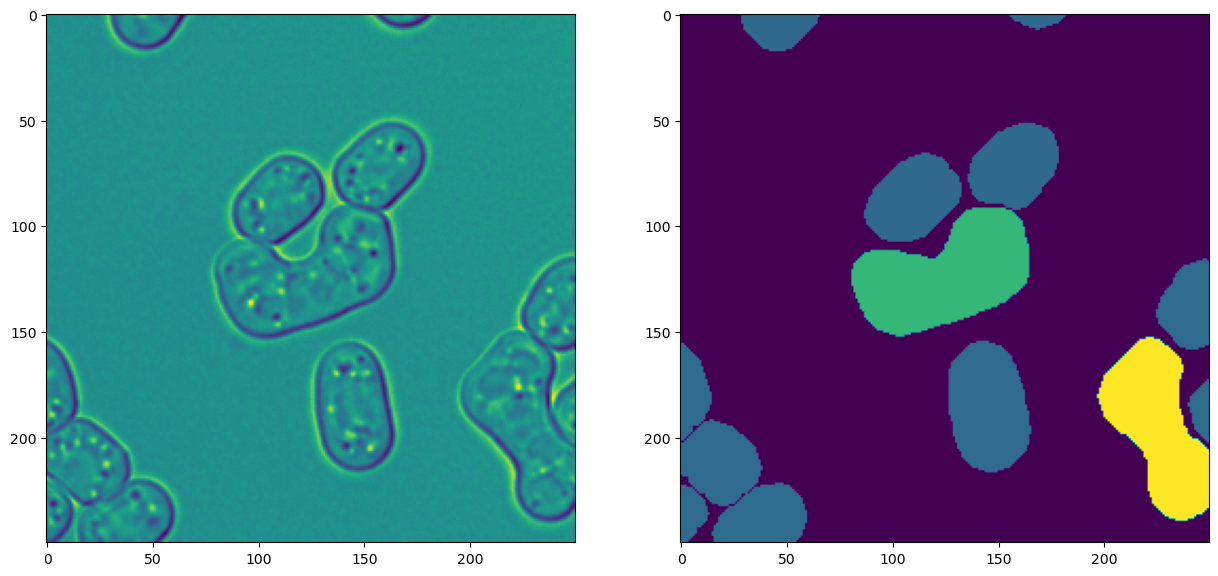

In [410]:
fig, axs = plt.subplots(1,2, figsize = (15,8))
frame = 140
axs[0].imshow(image[frame,:,:,0])
axs[1].imshow(image[frame,:,:,3])

In [401]:
basename = os.path.basename(filename)[:-4]
flag = 0
for i in range(200, 201, 50):
    if flag == 0:
        mask_path = os.path.join(root, "mask", "single_frame")
    else:
        mask_path = os.path.join(root, "mask", basename)
    if not os.path.exists(mask_path):
        os.mkdir(mask_path)
    imsave(os.path.join(mask_path, os.path.basename(basename+"_"+str(i)+".png")), image[i,:,:,3])
    
    if flag == 0:
        org_path = os.path.join(root, "org", "single_frame")
    else:
        org_path = os.path.join(root, "org", basename)
    if not os.path.exists(org_path):
        os.mkdir(org_path)
    imsave(os.path.join(org_path, os.path.basename(basename+"_"+str(i)+".png")), image[i,:,:,0])

In [412]:
main(mask_path, os.path.join(root, "xml", "single_frame.xml"))

In [190]:
basename

'20221225_vd_02_15_R3D_003001'